In [9]:
import theano 
#import pydot
import theano.tensor as T
from IPython.display import Image
import numpy as np

compute function f(x,y) = 3x + xy + 3y

In [3]:
# double scalar variable declearation
#in x and y we can use anything x = T.dscalar("hello")
x = T.dscalar('x')
y = T.dscalar('y')

# functional output
z = 3*x + x*y + 3*y

#compile the function using theano
f = theano.function(inputs=(x,y),outputs=z)

In [4]:
# function output is compile and stored in f so now we can invoke f by giving values of x and  y 
print f(1,1)
print f(2,2.96)

7.0
20.8


In [5]:
# for printing graph z
theano.printing.pydotprint(z, outfile='z.png',var_with_name_simple=True)

#for printing graph of f
theano.printing.pydotprint(f,outfile='f.png',var_with_name_simple=True)

The output file is available at z.png
The output file is available at f.png


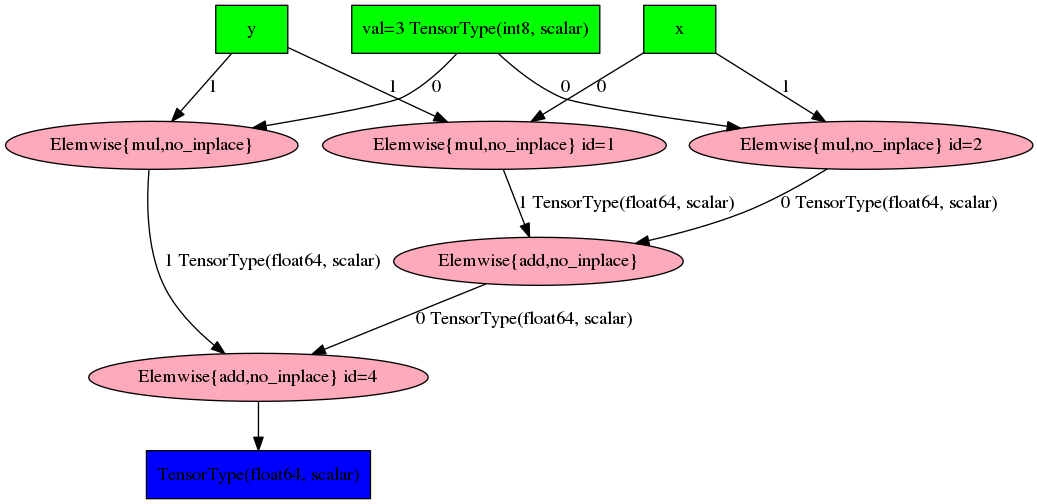

In [7]:
#graph for z
Image(filename="z.png")

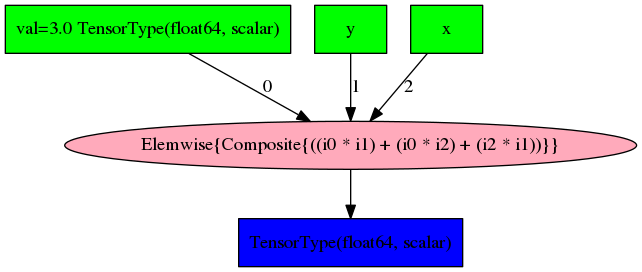

In [8]:
Image(filename="f.png")

# another example for single hidden layer we will use 
# f(x,W,b) = tanh(xW + b)

In [17]:
x = T.fvector()
b = T.fvector()
W = T.fmatrix()

activation = T.dot(x,W) + b
z = T.tanh(activation)
f = theano.function(inputs=(x,W,b),outputs=(activation, z))

In [18]:
inputX = np.asarray([0.1, 0.2, 0.3], dtype='float32')
inputW = np.asarray([[0.1,-0.2],[-0.4,0.5],[0.6,-0.7]], dtype='float32')
inputB = np.asarray([0.1,0.2], dtype='float32')

print "inputX.shape",inputX.shape
print "inputW.shape",inputW.shape

f(inputX, inputW, inputB)

inputX.shape (3,)
inputW.shape (3, 2)


[array([ 0.21000001,  0.06999999], dtype=float32),
 array([ 0.2069665 ,  0.06988588], dtype=float32)]

# shared variables and updates
## Using shared variables, we can create an internal state.
## Creation of a accumulator:
### At the beginning initialize the state to 0 With each function call update the state by certain value
### Later, in your neural networks, the weight matrices $W$ and 
### the bias values $b$ will be stored as internal state / as shared variable.
### Shared variables improve performance, as you need less transfer between 
### your Python code and the execution of the compute graph (which is written & compiled from C code)
### Shared variables can also be store on your graphic card

##### define init value 
init_value = 1

# define state
state = theano.shared(value=init_value,name='state')

#defining operator f(x) = 2*x
x = T.lscalar('x')
z = 2*x

accumalator = theano.function(inputs=[],outputs=z,givens={x: state})

In [30]:
print accumalator()

2


In [28]:
print accumalator()

2


In [40]:
# define increment variable for initvale increment
inc = T.lscalar('inc')
accumalator = theano.function(inputs=[inc],outputs=(state,z),
                              givens={x: state},updates=[(state,state + inc)])
print accumalator(1)
print accumalator(1)


[array(15), array(30)]
[array(16), array(32)]


In [41]:
print accumalator(2)

[array(17), array(34)]
